In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam

In [3]:
df=pd.read_csv('mine_hazard_data.csv')

In [4]:
df.describe()

Hydrogen Sulfide (H₂S)  Carbon Monoxide (CO)  Nitrogen Oxides (NOₓ)  \
count           100000.000000         100000.000000          100000.000000   
mean                 5.055754             20.011434              14.956818   
std                  2.871369              5.972521               6.805551   
min                  0.000000              5.000000               0.000000   
25%                  2.977408             15.925370              10.211330   
50%                  4.991839             20.015568              14.948263   
75%                  7.016129             24.035968              19.706622   
max                 15.000000             40.000000              30.000000   

       Sulfur Dioxide (SO₂)  Methane (CH₄)  Temperature (°C)   Humidity (%)  \
count         100000.000000  100000.000000     100000.000000  100000.000000   
mean               1.497808    3032.189146         39.929925      59.930720   
std                0.757977    1430.903593          7.749085       9.783723   
min                0.000000     500.000000         20.000000      30.000000   
25%                0.956937    1991.164814         34.604049      53.263152   
50%                1.499079    3012.291899         40.021197      60.005011   
75%                2.040005    4018.731546         45.415318      66.749072   
max                3.000000    7000.000000         55.000000      80.000000   

       Total Gas Concentration     Heat Index      Dew Point  Toxic Gas Index  \
count            100000.000000  100000.000000  100000.000000    100000.000000   
mean                 71.843706      45.922997      31.916069         9.378713   
std                  17.161527       7.816528       8.003894         1.943069   
min                  15.782205      23.152367       6.304735         1.954798   
25%                  59.684485      40.547536      26.412251         8.042884   
50%                  71.545517      46.005792      32.010642         9.365766   
75%                  83.603121      51.456704      37.568910        10.701642   
max                 144.993281      63.000000      51.000000        17.288877   

       Temperature-Humidity Index         Hazard  
count               100000.000000  100000.000000  
mean                    43.930084       5.135478  
std                      6.512134       0.814939  
min                     22.263350       1.250000  
25%                     39.460165       4.687500  
50%                     44.002065       5.000000  
75%                     48.525859       5.625000  
max                     60.000000       8.125000

In [5]:
df.head()

Time Stamp  Hydrogen Sulfide (H₂S)  Carbon Monoxide (CO)  \
0  2025-01-01 00:00:00                9.685522             11.601070   
1  2025-01-01 01:00:00                4.717315             23.286937   
2  2025-01-01 02:00:00                1.011393             19.275426   
3  2025-01-01 03:00:00                0.834086             18.300417   
4  2025-01-01 04:00:00                3.972048             24.605415   

   Nitrogen Oxides (NOₓ)  Sulfur Dioxide (SO₂)  Methane (CH₄)  \
0              30.000000              0.649580    5739.353517   
1              13.963312              0.843798    2834.709565   
2               2.877697              2.046584    1908.984212   
3              18.605274              1.834319    2458.992254   
4              14.553812              1.837967    5159.565853   

   Temperature (°C)  Humidity (%)  Total Gas Concentration  Heat Index  \
0         43.973713     70.305946               109.329707   51.004308   
1         38.893886     48.446452                71.158458   43.738531   
2         45.181508     65.754372                44.300942   51.756945   
3         52.184239     53.807615                64.164019   57.565000   
4         38.126773     56.725972                96.564901   43.799370   

   Dew Point  Toxic Gas Index  Temperature-Humidity Index  Hazard  
0  38.034902        12.083746                   49.240160  5.9375  
1  28.583176         8.386009                   40.804399  4.0625  
2  38.332383         6.791551                   49.296081  4.3750  
3  42.945762         8.539775                   52.508914  5.6250  
4  29.471967        11.251303                   41.846613  5.3125

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random

# Dropping non-feature columns
X = df.drop(['Hazard', 'Time Stamp'], axis=1)
Y = df['Hazard'].values  # Ensure Y is an array

# Normalize Input Features
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

seq = 30  # Sequence length

def create_sequence(X, y, seq):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq + 1):
        X_seq.append(X[i : i + seq])  
        y_seq.append(y[i + seq - 1])  # Target is the last time step
    return np.array(X_seq), np.array(y_seq)

X_seq, Y_seq = create_sequence(X, Y, seq)

# Check dimensions before train-test split
print("X_seq shape:", X_seq.shape, "| Y_seq shape:", Y_seq.shape)

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=42, shuffle=True)

# Final Check
print("Train shape:", X_train.shape, Y_train.shape, "| Test shape:", X_test.shape, Y_test.shape)


X_seq shape: (99971, 30, 12) | Y_seq shape: (99971,)
Train shape: (79976, 30, 12) (79976,) | Test shape: (19995, 30, 12) (19995,)



Training LSTM_Baseline...

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 2/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 3/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 4/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 5/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 6/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 7/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 8/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 33.3096 - mae: 5.6469 - val_loss: 33.3761 - val_mae: 5.6557
Epoch 9/25
2500/2500 ━━━━━━

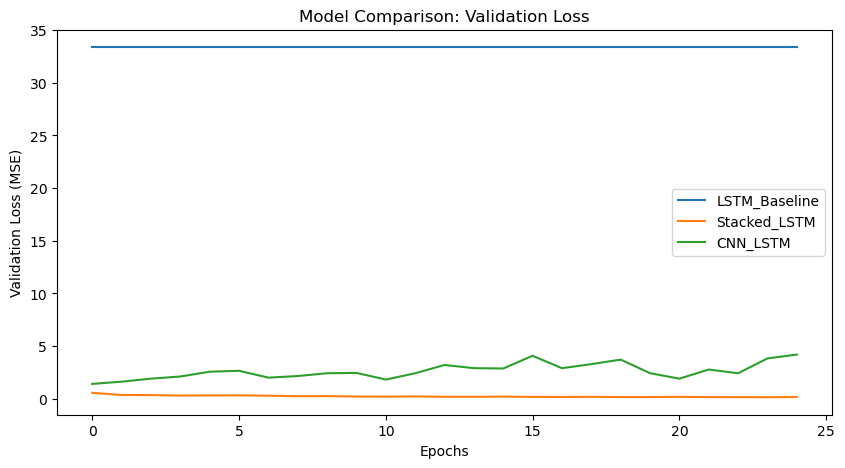


LSTM_Baseline Predictions (First 10 Samples):
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Stacked_LSTM Predictions (First 10 Samples):
 [[6.968709 ]
 [5.7187076]
 [5.4391775]
 [5.733447 ]
 [6.022541 ]
 [6.2504683]
 [5.0504503]
 [5.49205  ]
 [2.965961 ]
 [3.1910915]]

CNN_LSTM Predictions (First 10 Samples):
 [[4.73885  ]
 [4.140615 ]
 [3.3206782]
 [3.4481244]
 [4.1670713]
 [3.8520546]
 [3.4699473]
 [3.7442274]
 [1.5602047]
 [1.5491402]]


In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
# Normalize input features using MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 10))  # Scale hazard index between 0-10

X_train = x_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = x_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

Y_train = y_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_test = y_scaler.transform(Y_test.reshape(-1, 1))

# Define Relevant Models
def build_models():
    models = {}

    # Model 1: Baseline LSTM
    models["LSTM_Baseline"] = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1, activation='linear') # Changed from ReLU to Linear
    ])

    # Model 2: Stacked LSTM
    models["Stacked_LSTM"] = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(25, activation='relu'),
        Dense(1, activation='relu')  # Changed from ReLU to Linear
    ])

    # Model 3: CNN-LSTM
    models["CNN_LSTM"] = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1, activation='relu')  # Changed from ReLU to Linear
    ])

    return models

# Train & Evaluate Multiple Models
def train_and_evaluate(models):
    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...\n")
        
        # Compile model with Adam and gradient clipping
        model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse', metrics=['mae'])

        # Train model
        history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

        # Predict
        Y_pred_scaled = model.predict(X_test)
        Y_pred = y_scaler.inverse_transform(Y_pred_scaled)

        # Evaluate
        mse = tf.keras.losses.MeanSquaredError()(Y_test, Y_pred_scaled).numpy()
        mae = tf.keras.losses.MeanAbsoluteError()(Y_test, Y_pred_scaled).numpy()
        r2 = r2_score(Y_test, Y_pred_scaled)

        
        results[name] = {'MSE': mse, 'MAE': mae,'r2':r2, 'history': history, 'predictions': Y_pred}

        print(f"{name} - MSE: {mse:.5f}, MAE: {mae:.5f}, R2: {r2:.}")

    return results

# Plot Validation Loss Curves
def plot_loss(results):
    plt.figure(figsize=(10, 5))
    
    for name, res in results.items():
        plt.plot(res['history'].history['val_loss'], label=name)

    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss (MSE)')
    plt.legend()
    plt.title('Model Comparison: Validation Loss')
    plt.show()

# Run Experiment
models = build_models()
results = train_and_evaluate(models)
plot_loss(results)

# Show First 10 Predictions of Each Model
for name, res in results.items():
    print(f"\n{name} Predictions (First 10 Samples):\n", res['predictions'][:10])


In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# LSTM Model
model2 = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(25, activation='relu'),
        Dense(1, activation='relu')
        # Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        # MaxPooling1D(pool_size=2),
        # LSTM(50, activation='relu'),
        # Dropout(0.2),
        # Dense(25, activation='relu'),
        # Dense(1, activation='relu')  # Changed from ReLU to Linear
    ])

# Use Adam with lower LR
model2.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse', metrics=['mae'])

# Train model
history = model2.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Predict
Y_pred_scaled = model2.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred_scaled)

# Evaluate
mse = tf.keras.losses.MeanSquaredError()(Y_test, Y_pred_scaled).numpy()
mae = tf.keras.losses.MeanAbsoluteError()(Y_test, Y_pred_scaled).numpy()
r2 = r2_score(Y_test, Y_pred_scaled)

print(f"{name} - MSE: {mse:.5f}, MAE: {mae:.5f}, R2: {r2:.5f}")
# Ensure values stay in range [0, 10]
# Y_pred = np.clip(Y_pred, 0, 10)

print(Y_pred[:10])  # Print first 10 predictions


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 2.2995 - mae: 0.9665 - val_loss: 0.5505 - val_mae: 0.6047
Epoch 2/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 0.4792 - mae: 0.5513 - val_loss: 0.5281 - val_mae: 0.5926
Epoch 3/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.4045 - mae: 0.5063 - val_loss: 0.6740 - val_mae: 0.6791
Epoch 4/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.3732 - mae: 0.4859 - val_loss: 0.6272 - val_mae: 0.6530
Epoch 5/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - loss: 0.3582 - mae: 0.4752 - val_loss: 0.7211 - val_mae: 0.7088
Epoch 6/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.3378 - mae: 0.4615 - val_loss: 0.6660 - val_mae: 0.6810
Epoch 7/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.3291 - mae: 0.4553 - val_loss: 0.5516 - val_mae: 0.6118
Epoch 8/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.3163 - mae: 0.4457 - val_loss: 0.4593 - val_mae: 0.5547
Epoch 9/25
2500/2500 ━━━

In [53]:
model2.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 30, 64)         │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,939 (386.48 KB)

 Trainable params: 32,979 (128.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,960 (257.66 KB)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
import pandas as pd

# Compute Regression Metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R² Score: {abs(r2)}")

MSE: 0.2064967004834102
MAE: 0.3634179893281754
R² Score: 0.8513664231933007


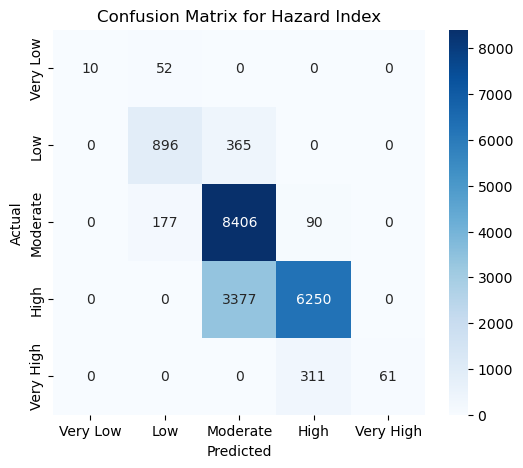

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert predictions into classified categories
thresholds = [1.9, 3.9, 5.9, 7.9]  
def classify_hazard(value):
    if value <= thresholds[0]: return "Very Low"
    elif value <= thresholds[1]: return "Low"
    elif value <= thresholds[2]: return "Moderate"
    elif value <= thresholds[3]: return "High"
    else: return "Very High"

y_true_classified = [classify_hazard(y) for y in Y_test.flatten()]
y_pred_classified = [classify_hazard(y) for y in Y_pred.flatten()]

cm = confusion_matrix(y_true_classified, y_pred_classified, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Very Low", "Low", "Moderate", "High", "Very High"],
            yticklabels=["Very Low", "Low", "Moderate", "High", "Very High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Hazard Index")
plt.show()


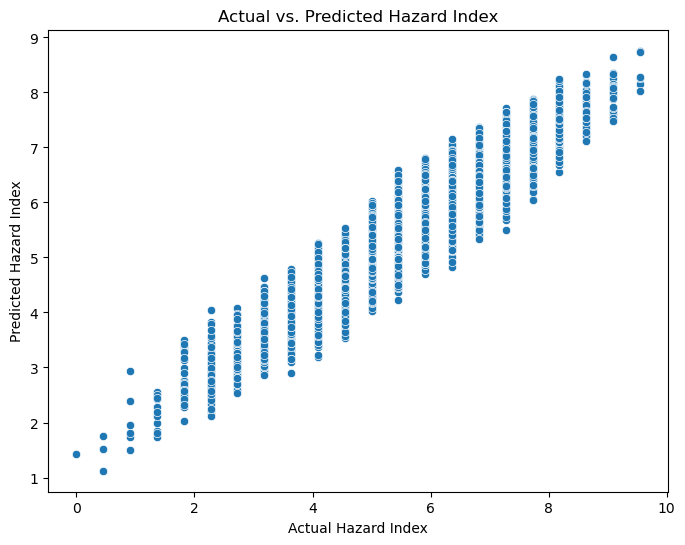

In [59]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.flatten(), y=Y_pred.flatten())
plt.xlabel('Actual Hazard Index')
plt.ylabel('Predicted Hazard Index')
plt.title('Actual vs. Predicted Hazard Index')
plt.show()

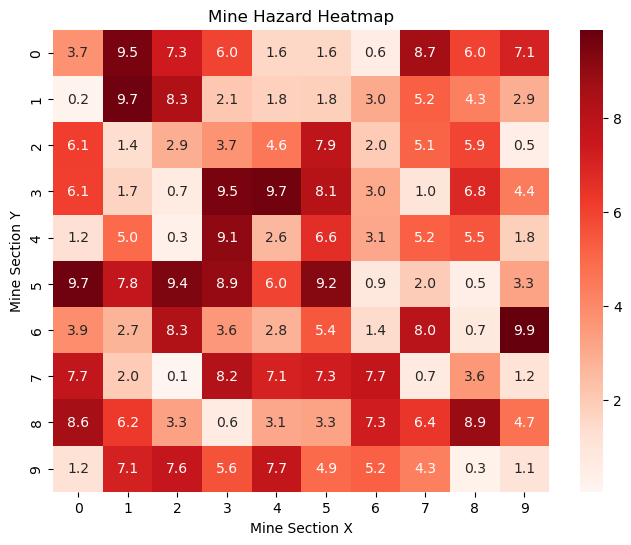

In [61]:
import numpy as np

hazard_map = np.random.rand(10, 10) * 10  # Simulated hazard index values

plt.figure(figsize=(8,6))
sns.heatmap(hazard_map, cmap="Reds", annot=True, fmt=".1f")
plt.title("Mine Hazard Heatmap")
plt.xlabel("Mine Section X")
plt.ylabel("Mine Section Y")
plt.show()

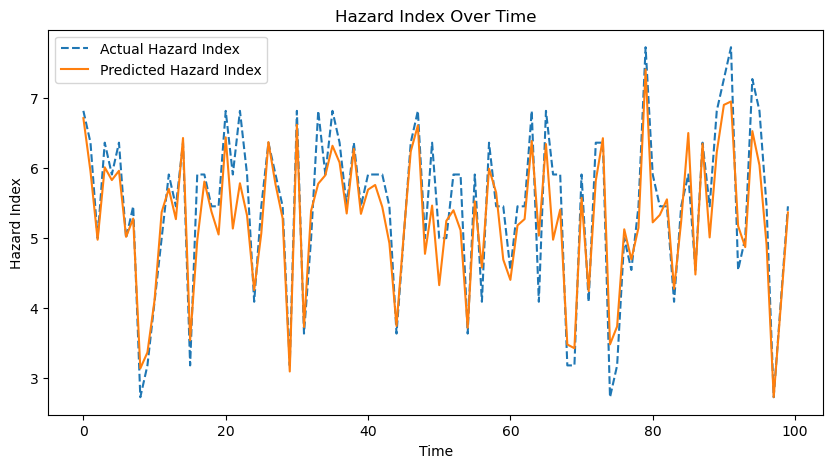

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(Y_test[:100], label='Actual Hazard Index', linestyle='dashed')
plt.plot(Y_pred[:100], label='Predicted Hazard Index')
plt.xlabel('Time')
plt.ylabel('Hazard Index')
plt.title('Hazard Index Over Time')
plt.legend()
plt.show()
